In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#LOADING DATASET
loanDF = pd.read_csv("loan.csv")
loanDF.head()

/Users/rajesh.ravindran/environment/vpyenv3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#CHECKING FOR DUPLICATE VALUES IN ID COLUMN
sum(loanDF.duplicated(subset='id'))

0

In [4]:
#CHECKING FOR DUPLICATE VALUES IN member_id COLUMN
sum(loanDF.duplicated(subset='member_id'))

0

In [5]:
#CHECKING THE STRUCTURE OF THE 
loanDF.shape

(39717, 111)

In [6]:
print(loanDF.isnull().sum())
print(loanDF.isnull().values.any())
print(loanDF.isnull().values.sum())

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
#IDENTIFY ROWS WITH 100% NA VALUES
#print(round(100*(loanDF.isnull().sum())/len(loanDF.index),2))
round(100*loanDF.isnull().mean(),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [8]:
#DROP COLUMNS WITH 100% NULL VALUES
pct_null = loanDF.isnull().mean()
missing_features = pct_null[pct_null >= 1].index
print(missing_features)
loanDF.drop(missing_features, axis=1, inplace=True)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [9]:
#CHECKING THE COLUMN NULL PERCENTAGES AFTER DELETION OF 100% NULL COLUMNS 
print(100*loanDF.isnull().mean())

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [10]:
loanDF.shape

(39717, 57)

In [11]:
pd.set_option('display.max_columns', None)
loanDF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [12]:
#removing url and desc columns
loanDF.drop(['url','desc'],axis=1,inplace=True)
loanDF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
#CHECK FOR UNIQUE VALUES FOR CATEGORICAL VARIABLES 
print(loanDF.term.unique())
print(loanDF.grade.unique())
print(loanDF.emp_title.unique())
print(loanDF.emp_length.unique())
print(loanDF.home_ownership.unique())
print(loanDF.verification_status.unique())
print(loanDF.issue_d.unique())
print(loanDF.loan_status.unique())
print(loanDF.pymnt_plan.unique())
print(loanDF.purpose.unique())
print(loanDF.title.unique())
print(loanDF.addr_state.unique())
print(loanDF.application_type.unique())

[' 36 months' ' 60 months']
['B' 'C' 'A' 'E' 'F' 'D' 'G']
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
['Verified' 'Source Verified' 'Not Verified']
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep-07' 'Aug-07' 'Jul-07' 'Jun-07']
['Fully Paid' 'Charged Off' 'Current']
['n']
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'ho

In [14]:
loanDF.emp_length = loanDF.emp_length.str.replace('years', '')
loanDF.emp_length = loanDF.emp_length.str.replace('year', '')
loanDF.emp_length = loanDF.emp_length.str.replace('<', '')
loanDF.emp_length = loanDF.emp_length.str.replace('+', '')
loanDF.emp_length = pd.to_numeric(loanDF.emp_length.str.strip())
loanDF.int_rate   = pd.to_numeric(loanDF.int_rate.str.replace('%','').str.strip())
loanDF.term = loanDF.term.str.strip()
print(loanDF.emp_length.unique())

[10.  1.  3.  8.  9.  4.  5.  6.  2.  7. nan]


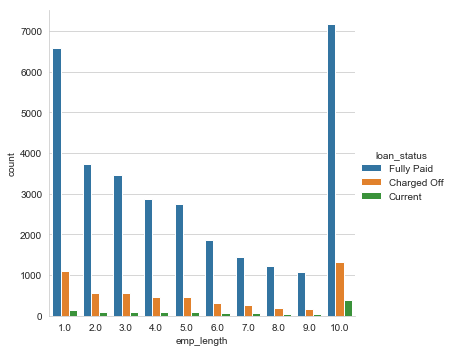

In [15]:
sns.catplot(x='emp_length', hue='loan_status', data=loanDF, kind='count')

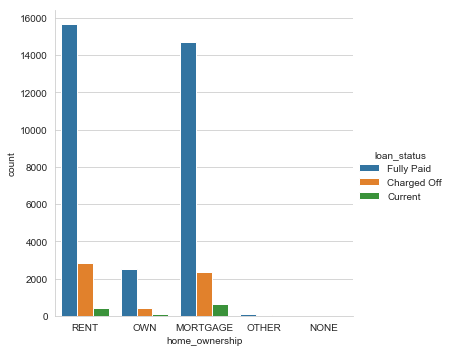

In [16]:
sns.catplot(x='home_ownership', hue='loan_status', data=loanDF, kind='count')

OBSERVATIONS
- MORE DEFAULTERS ON LOAN PROVIDED TO PEOPLE WHO ARE ON RENT OR MORTGAGE
- DEFAULTERS TOOK THE LOAN FOR DEBT CONSOLIDATION

In [17]:
loanDF.groupby('loan_status').size()/len(loanDF.index)*100


loan_status
Charged Off    14.167737
Current         2.870307
Fully Paid     82.961956
dtype: float64

- 83% of Loans are fully paid 
- 14.16% of Loans are Defaulters
- 2.87% loans are current loans

WE HAVE TO EVALUATE WHAT ARE THE DIFFERENCES IN PARAMETERS FOR FULLY PAID VS DEFAULTERS

<Figure size 2160x864 with 0 Axes>

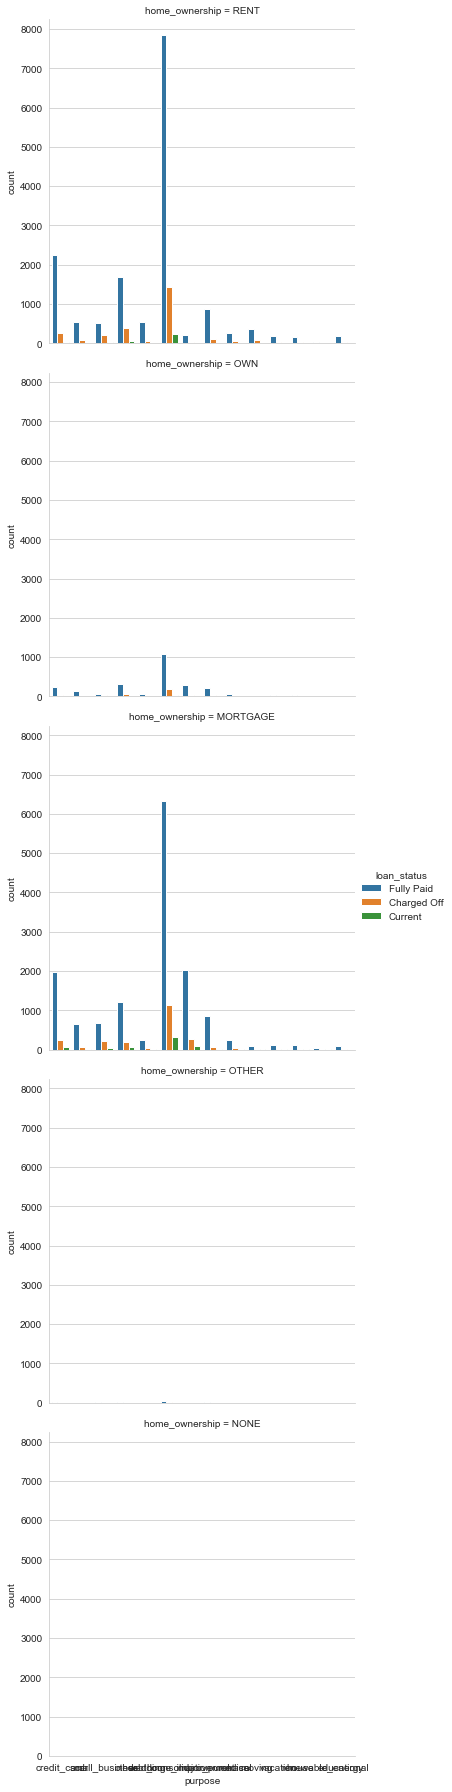

In [18]:
#COMPARING WITH THE PURPOSE FOR WHICH LOANS ARE TAKEN 
plt.figure(figsize=(30,12))
sns.catplot(x='purpose', hue='loan_status', data=loanDF, kind='count', row='home_ownership')
plt.show()

- FROM THE ABOVE PLOT WE CAN DELETE ROWS FOR HOME_OWNERSHIP AS OTHER AND NONE 

In [19]:
loanDF = loanDF[~loanDF.home_ownership.isin(['NONE','OTHER'])]

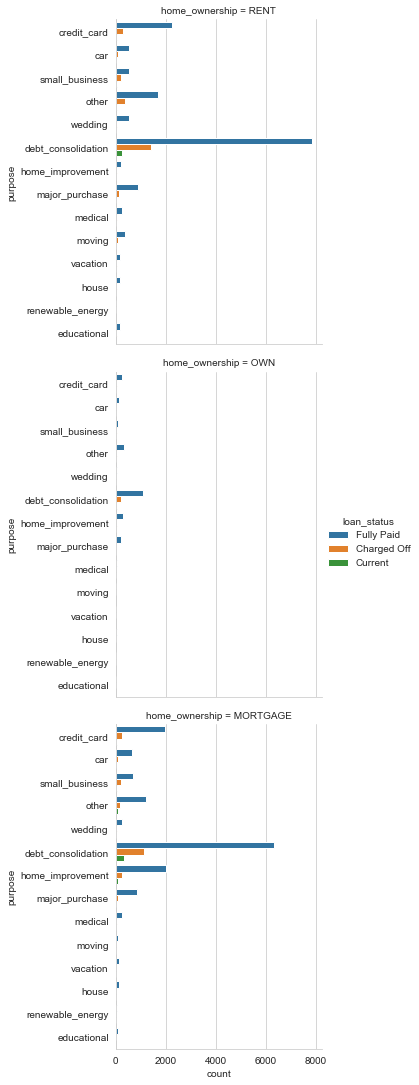

In [20]:
sns.catplot(y='purpose', hue='loan_status', data=loanDF, kind='count', row='home_ownership')

In [21]:
#CHECKING ROW DISTRIBUTION
loanDF.groupby('loan_status').size()/len(loanDF.index)*100

loan_status
Charged Off    14.158421
Current         2.877625
Fully Paid     82.963954
dtype: float64

In [22]:
loanDF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [23]:
print(loanDF.acc_now_delinq.unique())
print(loanDF.chargeoff_within_12_mths.unique())
print(loanDF.delinq_amnt.unique())
print(loanDF.pub_rec_bankruptcies.unique())
print(loanDF.tax_liens.unique())
print(loanDF.collections_12_mths_ex_med.unique())

[0]
[ 0. nan]
[0]
[ 0.  1.  2. nan]
[ 0. nan]
[ 0. nan]


In [24]:
#DROPPING THE COLUMNS WHERE values are only 0 or NA
loanDF.drop(['acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens','collections_12_mths_ex_med'], axis=1, inplace=True)

/Users/rajesh.ravindran/environment/vpyenv3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
print(loanDF.head())
print(loanDF.shape)

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0  1077501    1296599       5000         5000           4975.0  36 months   
1  1077430    1314167       2500         2500           2500.0  60 months   
2  1077175    1313524       2400         2400           2400.0  36 months   
3  1076863    1277178      10000        10000          10000.0  36 months   
4  1075358    1311748       3000         3000           3000.0  60 months   

   int_rate  installment grade sub_grade                 emp_title  \
0     10.65       162.87     B        B2                       NaN   
1     15.27        59.83     C        C4                     Ryder   
2     15.96        84.33     C        C5                       NaN   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD   
4     12.69        67.79     B        B5  University Medical Group   

   emp_length home_ownership  annual_inc verification_status issue_d  \
0        10.0           RENT     24000.0    

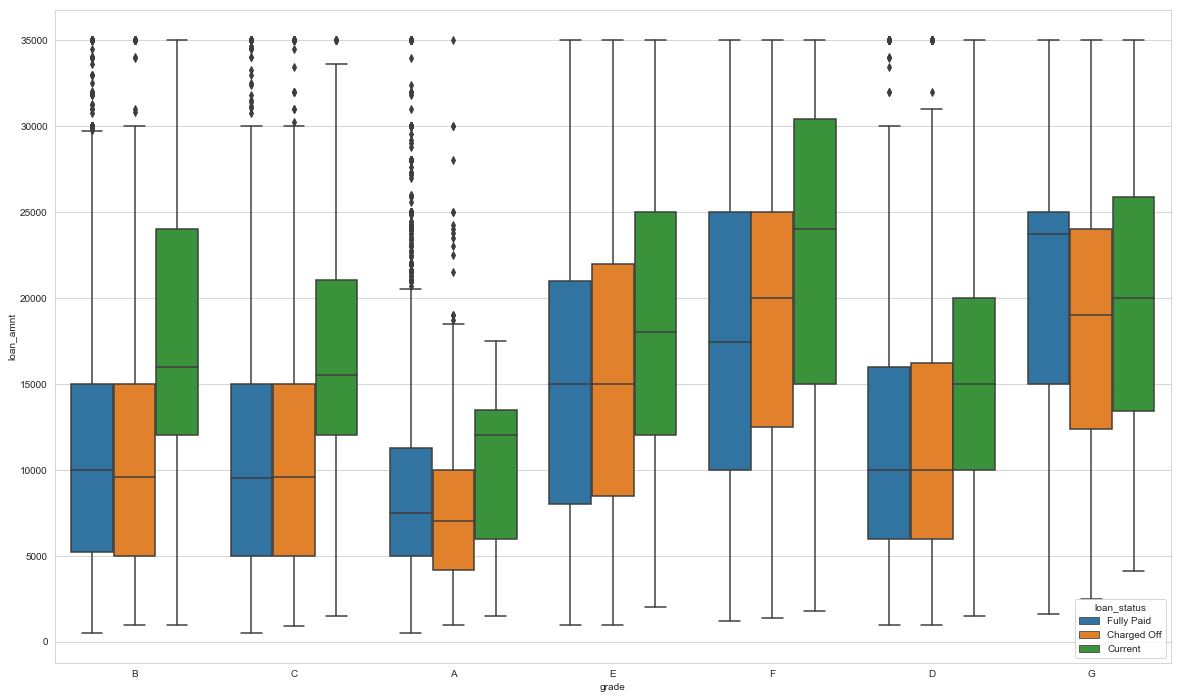

In [26]:
plt.figure(figsize=(20,12))
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=loanDF)
plt.show()

In [27]:
loanDFLTS = loanDF.loc[loanDF.loan_status == 'Charged Off']
loanDFLTS.groupby('purpose').size()/len(loanDFLTS.index)*100

purpose
car                    2.834730
credit_card            9.627385
debt_consolidation    49.206632
educational            0.998395
home_improvement       6.168658
house                  1.051881
major_purchase         3.957925
medical                1.889820
moving                 1.622393
other                 11.249777
renewable_energy       0.338741
small_business         8.397219
vacation               0.944910
wedding                1.711535
dtype: float64

/Users/rajesh.ravindran/environment/vpyenv3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


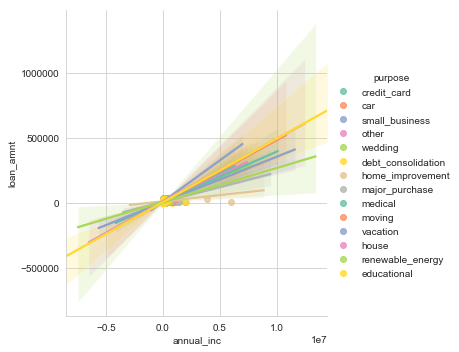

In [28]:
sns.lmplot(x="annual_inc", y="loan_amnt", hue="purpose", data=loanDF, palette="Set2");

In [29]:
#sns.pairplot(loanDF)


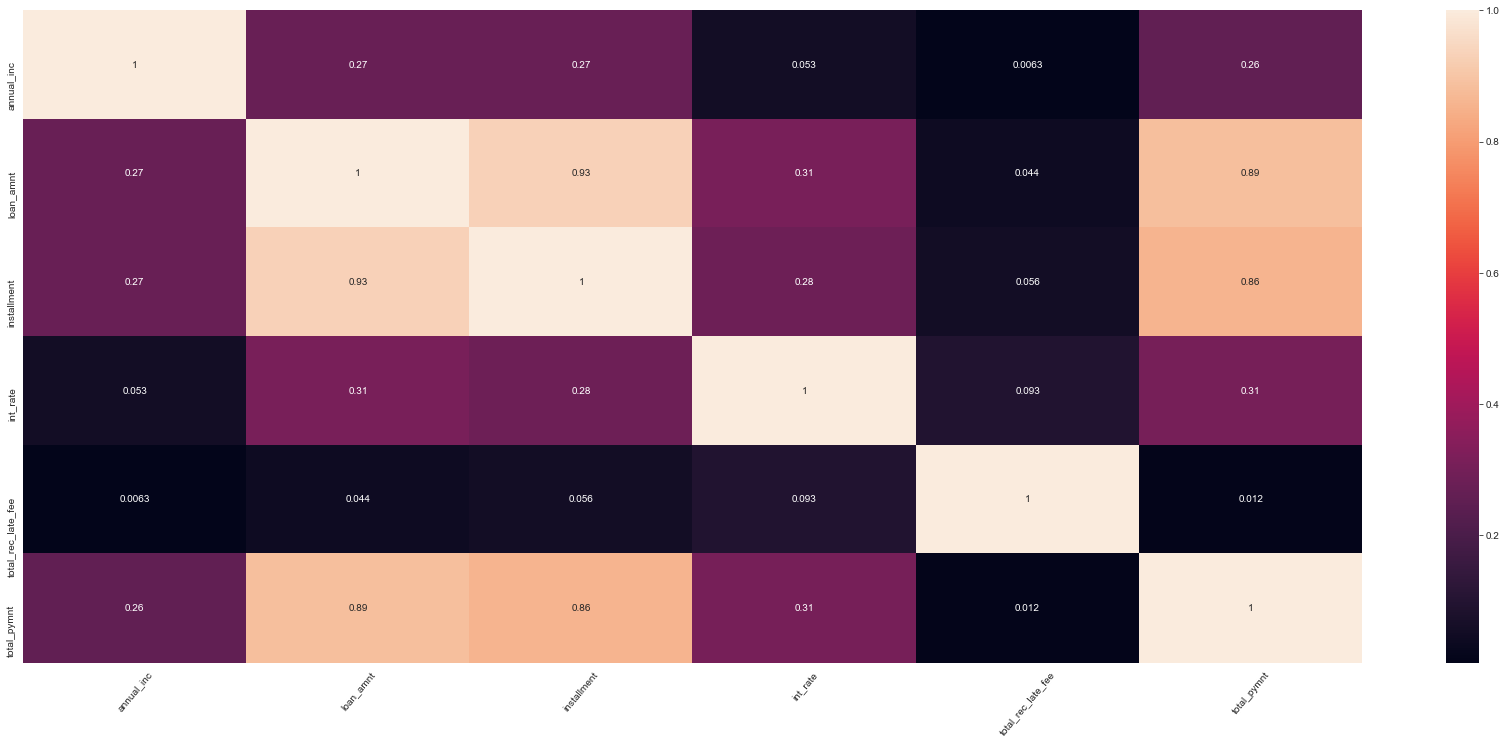

In [30]:
#CHECKING OUT FEW CORRELATIONS
plt.figure(figsize=(30,12))
#sns.heatmap(loanDFLTS[['loan_amnt','dti','revol_bal']].corr(),annot=True)
sns.heatmap(loanDF[['annual_inc','loan_amnt', 'installment','int_rate', 'total_rec_late_fee','total_pymnt']].corr(),annot=True)
plt.xticks(rotation=50)
plt.show()

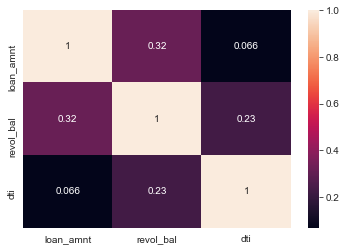

In [31]:
sns.heatmap(loanDF[['loan_amnt', 'revol_bal','dti']].corr(),annot=True)

In [32]:
loanDF.policy_code.unique()

array([1])

In [33]:
#uberDF.loc[(uberDF.Request_HR >= 0) & (uberDF.Request_HR < 1),'TimeSlot'] = 'Mid Night'
#loanDF.int_rate   = pd.to_numeric(loanDF.int_rate.str.replace('%','').str.strip())
loanDF.loc[(loanDF.int_rate <= 5), 'int_slot'] = '0-5'
loanDF.loc[(loanDF.int_rate > 5) & (loanDF.int_rate <= 10), 'int_slot'] = '6-10'
loanDF.loc[(loanDF.int_rate > 10) & (loanDF.int_rate <= 15), 'int_slot'] = '11-15'
loanDF.loc[(loanDF.int_rate > 15) & (loanDF.int_rate <= 20), 'int_slot'] = '16-20'
loanDF.loc[(loanDF.int_rate > 20 ), 'int_slot'] = '20+'

/Users/rajesh.ravindran/environment/vpyenv3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/rajesh.ravindran/environment/vpyenv3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
loanDF.int_slot.unique()

array(['11-15', '16-20', '6-10', '20+'], dtype=object)

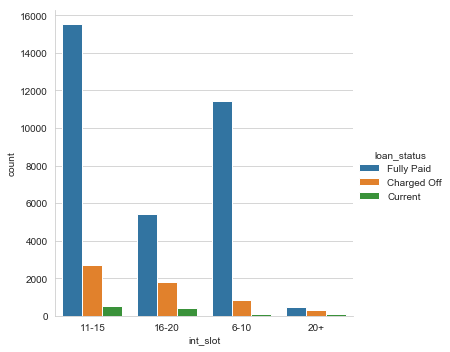

In [35]:
sns.catplot(x='int_slot', hue='loan_status', data=loanDF, kind='count')

In [36]:

loanDFLTSgrpBy=loanDFLTS.groupby(['purpose','title','loan_status'])['loan_amnt'] \
.agg(sum).reset_index(name='loan_amnt')


loanDFLTSgrpBy


,purpose,title,loan_status,loan_amnt
0,car,05' Hyundai Sonata,Charged Off,7875
1,car,1993 Softail Rig,Charged Off,9000
2,car,AUTO,Charged Off,14350
3,car,Acura,Charged Off,16800
4,car,Auto,Charged Off,27900
5,car,Auto Financing,Charged Off,4000
6,car,Auto Loan,Charged Off,58700
7,car,Auto Sep11,Charged Off,14400
8,car,Auto purchase,Charged Off,5500
9,car,Automobile and Home fixing,Charged Off,7000


In [37]:

loanDF['percentage_payment_received'] = (loanDF.total_pymnt/loanDF.loan_amnt)*100
loanDF['percentage_payment_not_received'] = (1-(loanDF.total_pymnt/loanDF.loan_amnt))*100

def PercentageBucketing(val):
    if (val < 10):
        return '0-9'
    elif (val >= 10 and val < 20):
        return '10-19'
    elif (val >= 20 and val < 30):
        return '20-29'
    elif (val >= 30 and val < 40):
        return'30-39'
    elif (val >= 40 and val < 50):
        return '40-49'
    elif (val >= 50 and val < 60):
        return '50-59'
    elif (val >= 60 and val < 70):
        return '60-69'
    elif (val >= 70 and val < 80):
        return '70-79'
    elif (val >= 80 and val < 90):
        return '80-89'
    elif (val >= 90 and val < 100):
        return '90-99'
    elif (val >= 100 ):
        return '100'    


loanDF['percentage_payment_received_range']=loanDF.percentage_payment_received.apply(lambda x: PercentageBucketing(x))
loanDF['percentage_payment_not_received_range']=loanDF.percentage_payment_not_received.apply(lambda x: PercentageBucketing(x))


/Users/rajesh.ravindran/environment/vpyenv3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/rajesh.ravindran/environment/vpyenv3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rajesh.ravindran/environment/vpyenv3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [38]:
loanDF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,int_slot,percentage_payment_received,percentage_payment_not_received,percentage_payment_received_range,percentage_payment_not_received_range
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,1,INDIVIDUAL,0.0,11-15,117.263104,-17.263104,100,0-9
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,1,INDIVIDUAL,0.0,16-20,40.348400,59.651600,40-49,50-59
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,1,INDIVIDUAL,0.0,16-20,125.236119,-25.236119,100,0-9
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,1,INDIVIDUAL,0.0,11-15,122.318900,-22.318900,100,0-9
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,1,INDIVIDUAL,0.0,11-15,117.111000,-17.111000,100,0-9


In [39]:

df = loanDF.groupby(['percentage_payment_received_range','percentage_payment_not_received_range', 'loan_status'])['loan_amnt'].agg(sum).reset_index(name='loan_amnt')



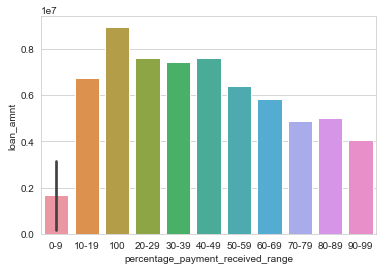

In [40]:
sns.barplot(x='percentage_payment_received_range', y='loan_amnt', data=df.loc[df.loan_status == 'Charged Off'])


- STRANGLY THERE ARE SOME CHARGED OFF LOANS WHICH ARE 100% PAID? WHY WOULD THIS TYPE OF LOANS STILL CATEGORIZED AS CHARGED LOANS

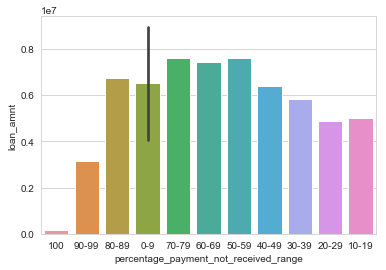

In [41]:
sns.barplot(x='percentage_payment_not_received_range', y='loan_amnt', data=df.loc[df.loan_status == 'Charged Off'])


/Users/rajesh.ravindran/environment/vpyenv3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


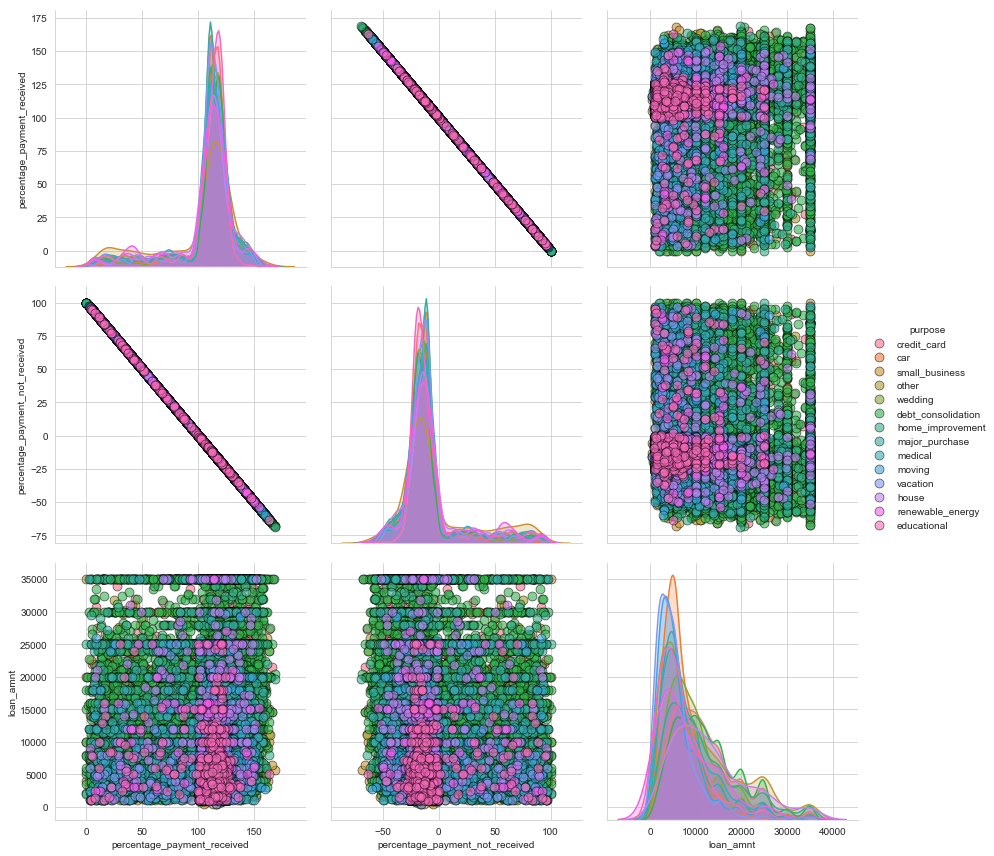

In [42]:
#
sns.pairplot(loanDF, 
             vars = ['percentage_payment_received', 'percentage_payment_not_received', 'loan_amnt'], 
             hue = 'purpose', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

/Users/rajesh.ravindran/environment/vpyenv3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


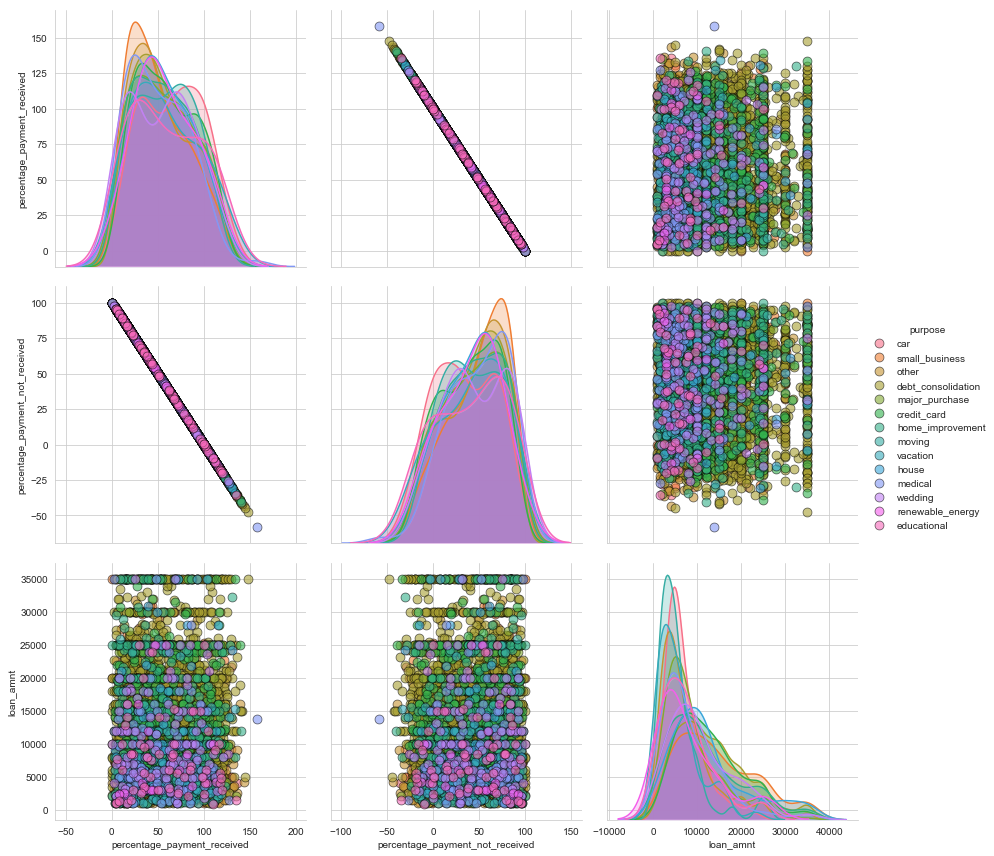

In [43]:
sns.pairplot(loanDF.loc[(loanDF['loan_status'] == 'Charged Off')], 
             vars = ['percentage_payment_received', 'percentage_payment_not_received', 'loan_amnt'], 
             hue = 'purpose', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

In [44]:
#loan Bucket 
# > 20k Extremly High Value
# > 15-20  High value
# > 10 - 15 moderately high value
# > 5 - 10 moderate
# < 5 low value 

def loan_bucket(val):
    if val <= 5000:
        return 'LOW'
    elif val <= 10000:
        return 'MODERATE'
    elif val <= 15000:
        return 'MODERATE HIGH'
    elif val <= 20000:
        return 'HIGH'
    else:
        return 'EXTREME HIGH'
    
loanDF['loan_value'] = loanDF.loan_amnt.apply(lambda x: loan_bucket(x))

/Users/rajesh.ravindran/environment/vpyenv3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
loanDFLTS = loanDF.loc[loanDF.loan_status == 'Charged Off']
loanDFLTS.groupby('purpose').size()/len(loanDFLTS.index)*100

purpose
car                    2.834730
credit_card            9.627385
debt_consolidation    49.206632
educational            0.998395
home_improvement       6.168658
house                  1.051881
major_purchase         3.957925
medical                1.889820
moving                 1.622393
other                 11.249777
renewable_energy       0.338741
small_business         8.397219
vacation               0.944910
wedding                1.711535
dtype: float64

- FROM THE ABOVE WE CAN SEE MAJORITY OF CHARGED OFF LOANS ARE FALLING UNDER DEBT CONSOLIDATION
- FOLLOWED BY OTHER, CREDIT CARD, SMALL BUSINESS, HOME IMPROVEMENT, MAJOR PURCHASE, CAR

- SMALL PERCENTAGE IN OTHERS - WEDDING, VACATION, MEDICAL, HOUSE ETC

CONTINUING THE ANALYSIS ON THE DEBT CONSOLIDATION

/Users/rajesh.ravindran/environment/vpyenv3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


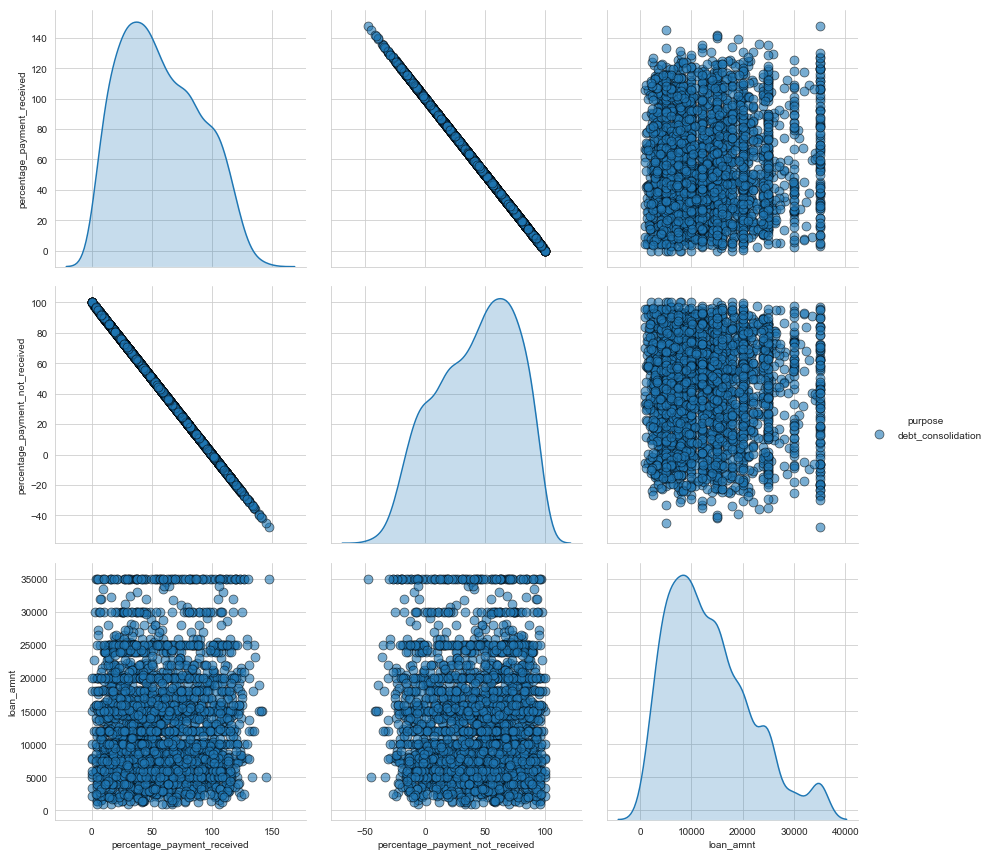

In [46]:
sns.pairplot(loanDF.loc[(loanDF['loan_status'] == 'Charged Off') & (loanDF['purpose'] == 'debt_consolidation')], 
             vars = ['percentage_payment_received', 'percentage_payment_not_received', 'loan_amnt'], 
             hue = 'purpose', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

- AS WE CAN SEE FROM THE PLOTS ABOVE, MAJORITY OF THE LOAN AMOUNT FALLS BETWEEN $1000 & $20000 
- DENSITY OF CHARGED OFF IS MORE IN THIS RANGE (ROW 2 COLUMN 3). 
- LET US SEE DIFFERENT CATEGORIES IN THIS AREA 

In [47]:
debtConsolidation = loanDF.loc[(loanDF['loan_status'] == 'Charged Off') & (loanDF['purpose'] == 'debt_consolidation')]


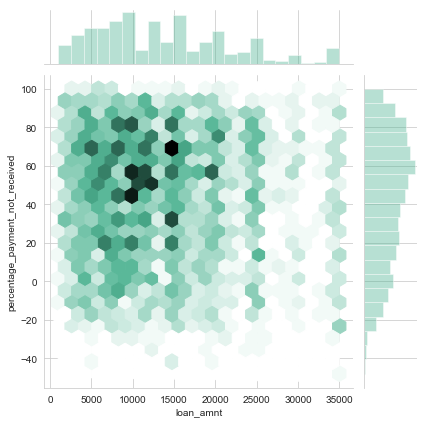

In [48]:
#sns.set(style="white", palette="muted", color_codes=True)
sns.jointplot(debtConsolidation.loan_amnt, debtConsolidation.percentage_payment_not_received, kind="hex", color="#4CB391")


In [49]:
debtConsolidation.groupby('loan_value')['loan_amnt'].agg(['count','sum','mean','median'])

,count,sum,mean,median
loan_value,,,,
EXTREME HIGH,500,13377775,26755.550000,25000
HIGH,461,8308225,18022.180043,18000
LOW,432,1568000,3629.629630,4000
MODERATE,770,6199525,8051.331169,8000
MODERATE HIGH,597,7849025,13147.445561,13000


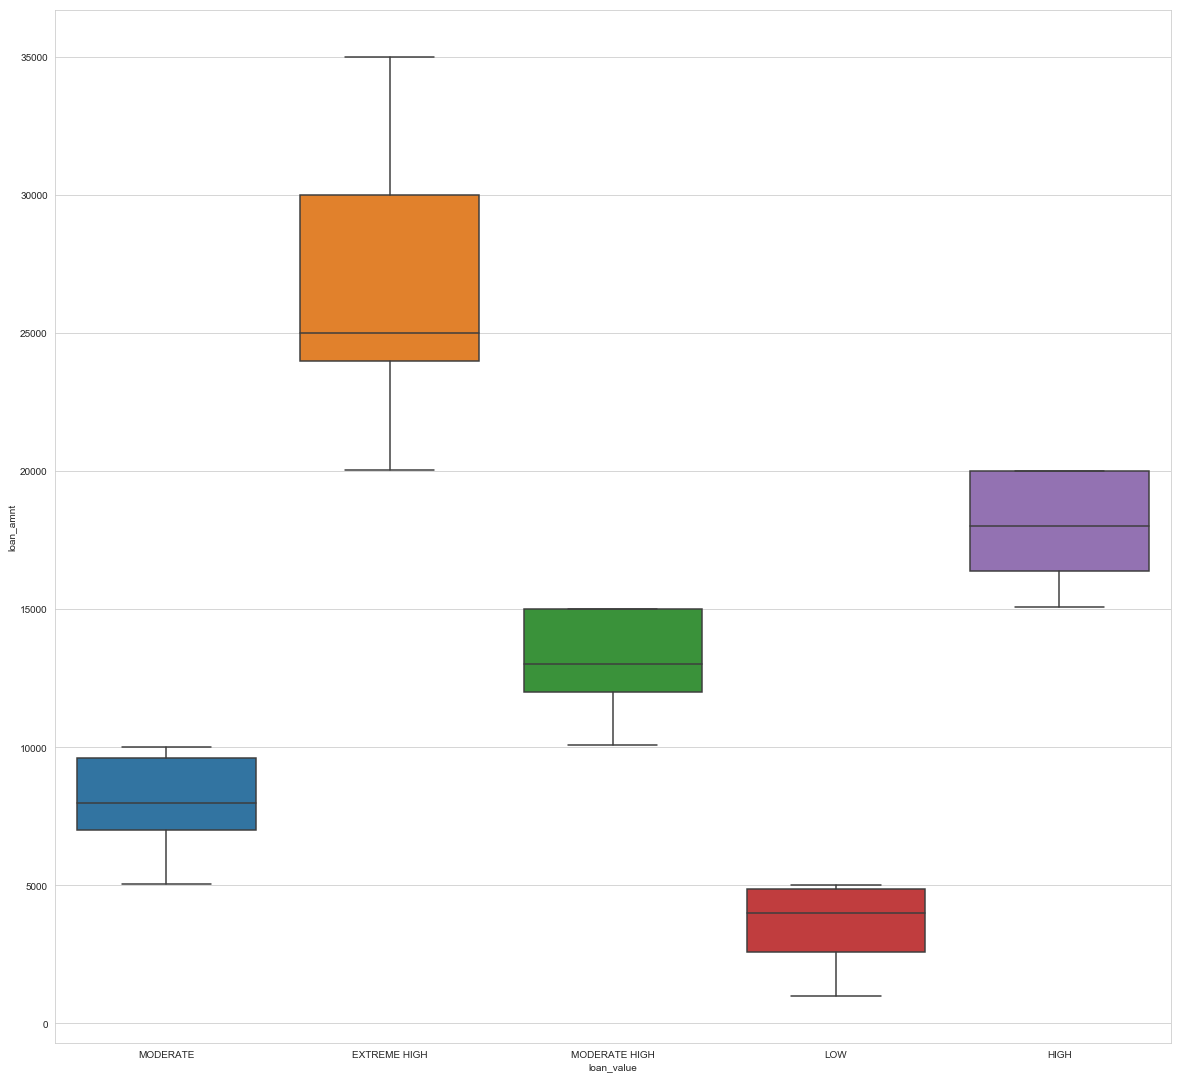

In [50]:
plt.figure(figsize=(20,19))
sns.boxplot(x='loan_value', y='loan_amnt', data=debtConsolidation)
plt.show()

- BASED ON THE ABOVE WE CAN INFER THAT WE HAVE A HUGE AMOUNT OF LOAN PENDING IN EXTREME HIGH LOAN VALUE. 

CONTINUING INVESTIGATION ON EXTREMLY HIGH VALUE LOANS

In [51]:
#LOANS LESS THAN 20K 
debt_under_20k = debtConsolidation.loc[debtConsolidation.loan_amnt <=20000,]

#LOANS GREATER THAN 20K
debt_more_20k = debtConsolidation.loc[debtConsolidation.loan_amnt >20000,]

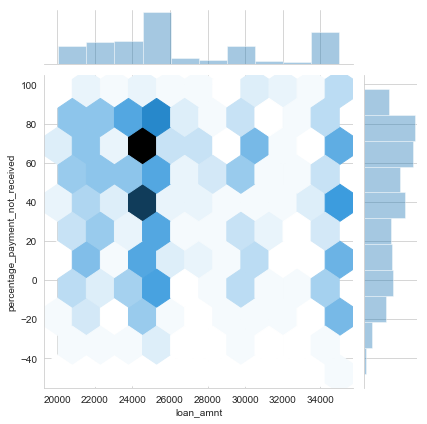

In [52]:
sns.jointplot(debt_more_20k.loan_amnt, debt_more_20k.percentage_payment_not_received, kind="hex")

In [53]:

debt_more_20k.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,int_slot,percentage_payment_received,percentage_payment_not_received,percentage_payment_received_range,percentage_payment_not_received_range,loan_value
21,1039153,1269083,21000,21000,21000.0,36 months,12.42,701.73,B,B4,Osram Sylvania,10.0,RENT,105000.0,Verified,Dec-11,Charged Off,n,debt_consolidation,Debt Cleanup,335xx,FL,13.22,0,Feb-83,0,NaN,NaN,7,0,32135,90.30%,38,f,0.0,0.0,14025.40,14025.40,10694.96,3330.44,0.00,0.00,0.0000,Sep-13,701.73,NaN,May-16,1,INDIVIDUAL,0.0,11-15,66.787619,33.212381,60-69,30-39,EXTREME HIGH
55,1069410,1303652,21000,21000,20975.0,60 months,19.91,555.33,E,E4,Costco,7.0,RENT,50000.0,Verified,Dec-11,Charged Off,n,debt_consolidation,Bill pay of,980xx,WA,21.58,0,Sep-98,1,NaN,NaN,7,0,19448,97.60%,14,f,0.0,0.0,18319.14,18297.35,8990.81,9328.33,0.00,0.00,0.0000,Oct-14,555.33,NaN,May-16,1,INDIVIDUAL,0.0,16-20,87.234000,12.766000,80-89,10-19,EXTREME HIGH
124,1068179,1302564,28000,11800,11775.0,60 months,19.91,312.04,E,E4,American Airlines,10.0,RENT,52000.0,Verified,Dec-11,Charged Off,n,debt_consolidation,Debt Consalidation,752xx,TX,20.70,0,Dec-88,0,NaN,NaN,10,0,29178,87.60%,16,f,0.0,0.0,12173.07,12147.29,4281.54,4759.37,0.00,3132.16,563.7888,Jun-14,312.04,NaN,Sep-14,1,INDIVIDUAL,0.0,16-20,43.475250,56.524750,40-49,50-59,EXTREME HIGH
179,1067126,1301506,21000,21000,21000.0,60 months,11.71,464.07,B,B3,Calix,3.0,RENT,60000.0,Not Verified,Dec-11,Charged Off,n,debt_consolidation,Consolidate me 2011,931xx,CA,6.62,0,Dec-90,0,NaN,NaN,7,0,10543,79.90%,11,f,0.0,0.0,3708.24,3708.24,2142.87,1565.37,0.00,0.00,0.0000,Aug-12,464.07,NaN,Aug-12,1,INDIVIDUAL,0.0,11-15,17.658286,82.341714,10-19,80-89,EXTREME HIGH
314,1065649,1299755,25000,25000,24975.0,60 months,18.64,643.58,E,E1,KINGS COUNTY DISTRICT ATTORNEY'S OFFICE,10.0,RENT,61500.0,Verified,Dec-11,Charged Off,n,debt_consolidation,CLEAR UP,112xx,NY,12.60,1,Apr-00,0,22.0,NaN,11,0,24278,60.80%,25,f,0.0,0.0,25775.38,25749.68,13993.40,11732.12,32.18,17.68,3.1824,Apr-15,643.58,NaN,May-16,1,INDIVIDUAL,0.0,16-20,103.101520,-3.101520,100,0-9,EXTREME HIGH


In [54]:
debtConsolidation.groupby('loan_value')['loan_amnt'].agg(['count','sum','mean','median'])

,count,sum,mean,median
loan_value,,,,
EXTREME HIGH,500,13377775,26755.550000,25000
HIGH,461,8308225,18022.180043,18000
LOW,432,1568000,3629.629630,4000
MODERATE,770,6199525,8051.331169,8000
MODERATE HIGH,597,7849025,13147.445561,13000


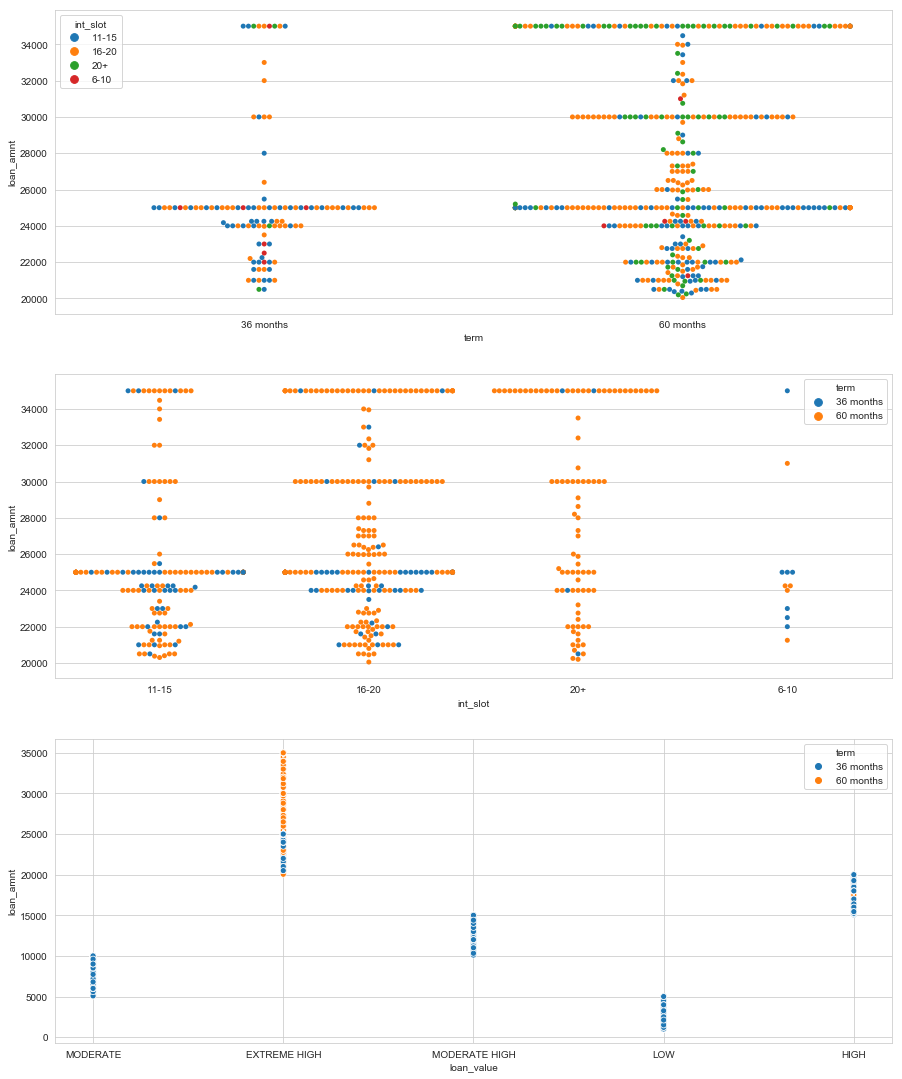

In [55]:
plt.figure(figsize=(15,19))
plt.subplot(3,1,1)
sns.swarmplot(y="loan_amnt", x="term", hue="int_slot", data=debt_more_20k)
plt.subplot(3,1,2)
sns.swarmplot(y="loan_amnt", hue="term", x="int_slot", data=debt_more_20k)
plt.subplot(3,1,3)
sns.scatterplot(x="loan_value", y="loan_amnt", data=debtConsolidation, hue='term')
plt.show()
plt.show()

- CLEARLY FOR EXTREMLY HIGH INTEREST LOANS WE ARE SEEING MORE DEFAULTERS FOR THE LOANS TAKEN FOR 60 MONTH TERM
- EXTREMLY HIGH VALUE LOANS WITH HIGHER INTEREST RATE BETWEEN 11-20% HAVE MORE DEFAULTERS 
- RATE OF DEFAULTERS ARE LOW FOR 36 MONTH TERM IN EXTREMLY HIGH CATEGORY 

DIGGING DEEPER ON 60 MONTHS FOR EXTERME HIGH VALUE LOANS

/Users/rajesh.ravindran/environment/vpyenv3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x1368 with 0 Axes>

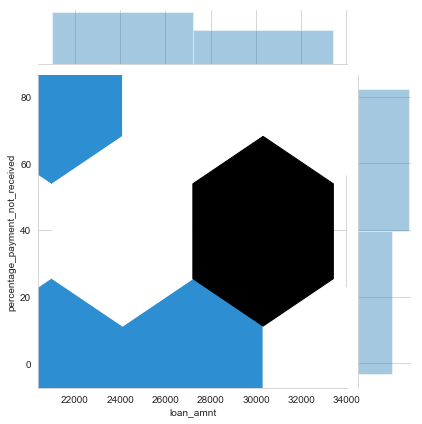

array([' Bill pay of', 'Debt Consalidation', 'Consolidate me 2011',
       'CLEAR UP', 'Debt Consolidation Loan'], dtype=object)

In [64]:
#debtConsolidation.term.unique()

debt_extreme_60M = debtConsolidation.loc[(debtConsolidation['term'] == '60 months') & (debtConsolidation['loan_value'] == 'EXTREME HIGH') ,].head()
plt.figure(figsize=(15,19))
sns.jointplot(debt_extreme_60M.loan_amnt, debt_extreme_60M.percentage_payment_not_received, kind="hex")
plt.show()

debt_extreme_60M.title.unique()

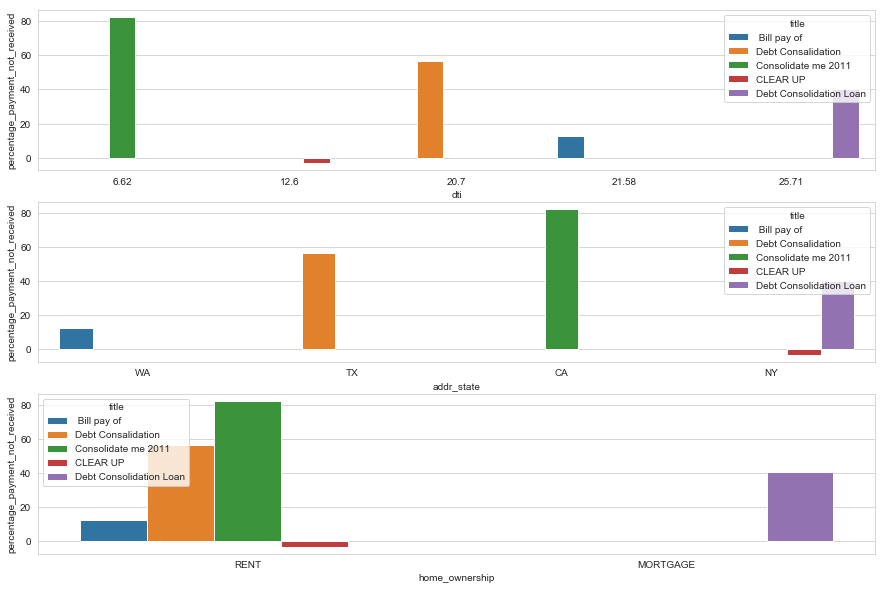

In [71]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
sns.barplot(x='dti', y='percentage_payment_not_received', data=debt_extreme_60M, hue = 'title')
plt.subplot(3,1,2)
sns.barplot(x='addr_state', y='percentage_payment_not_received', data=debt_extreme_60M, hue = 'title')
plt.subplot(3,1,3)
sns.barplot(x='home_ownership', y='percentage_payment_not_received', data=debt_extreme_60M, hue = 'title')
plt.show()

 - THERE IS NO PARTICULAR INFERENCES THAT CAN BE DRAWN WITH DTI. BUT IT CAN BE INFERRED THAT HIGHEST LOAN THAT ARE GOING INTO DEFAULT ARE THE ONES WHICH ARE TAKEN FOR DEBT CONSOLIDATION.
 
 - WA, TX, CA and NY HAVE HIGHER DEFAULTERS RATE FOR EXTREMLY HIGH VALUE LOANS TAKEN FOR DEBT CONSOLIDATION
 
 - MORE DEFAULTERS BY MEMBERS WHO ARE LIVING ON RENT
 

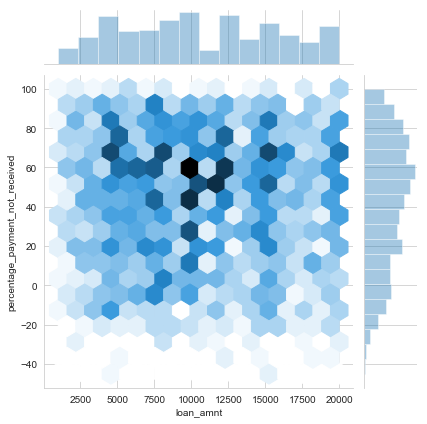

In [57]:

sns.jointplot(debt_under_20k.loan_amnt, debt_under_20k.percentage_payment_not_received, kind="hex")


In [58]:
debt_under_20k.groupby('title')['loan_amnt'].agg('sum')

title
 Debt Consolidation Loan                                   15000
 Freedom Loan                                               6000
 debt consolidation                                         2000
$20,000 Consolidation Loan needed                          20000
$20,000 paid in 36 months                                  20000
$3000 Loan                                                  6000
0809healthbills                                            15000
1                                                          19400
1 cent                                                     16000
11/2010 Debt Consolidation Loan                            12000
11cbgreatloan                                               9000
13K in 26 mnts                                             13600
1st Loan                                                    6000
2008 resolution                                            15000
2010 GOAL                                                  10000
2010 Relief from hi

In [59]:
len(debt_under_20k.index)

2260